In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/priject1/lab9/diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
from sklearn.model_selection import train_test_split
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
X_train.shape, X_val.shape, X_test.shape

((552, 8), (139, 8), (77, 8))

In [6]:
from sklearn import svm
svm_linear = svm.SVC(kernel = 'linear')
svm_linear.fit(X_train, y_train)
svm_linear.score(X_val, y_val)

0.8057553956834532

In [7]:
svm_poly = svm.SVC(kernel = 'poly')
svm_poly.fit(X_train, y_train)
svm_poly.score(X_val, y_val)

0.7841726618705036

In [8]:
svm_gauss = svm.SVC(kernel="rbf")
svm_gauss.fit(X_train, y_train)
svm_gauss.score(X_val, y_val)

0.7553956834532374

In [9]:
svm_soft = svm.SVC(C=1.0)
svm_soft.fit(X_train, y_train)
svm_soft.score(X_val, y_val)

0.7553956834532374

In [10]:
svm_hard = svm.SVC(C=100)
svm_hard.fit(X_train, y_train)
svm_hard.score(X_val, y_val)

0.762589928057554

In [16]:
from sklearn.model_selection import GridSearchCV
grid = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [40]:
gs_svm_linear = GridSearchCV(estimator= svm_linear, param_grid=grid, cv=5)
gs_svm_linear.fit(X_val, y_val)
print("Linear kernal svm with grid search and 5 fold cross validation")
print("Best parameter value:", gs_svm_linear.best_params_)
print("Accuracy on test sata:", gs_svm_linear.score(X_test, y_test))
print("Number of support vectors:", len(svm_linear.support_vectors_))

Linear kernal svm with grid search and 5 fold cross validation
Best parameter value: {'C': 0.1}
Accuracy on test sata: 0.7402597402597403
Number of support vectors: 294


In [41]:
gs_svm_poly = GridSearchCV(estimator= svm_poly, param_grid=grid, cv=5)
gs_svm_poly.fit(X_val, y_val)
print("Poly kernal svm with grid search and 5 fold cross validation")
print("Best parameter value:", gs_svm_poly.best_params_)
print("Accuracy on test sata:", gs_svm_poly.score(X_test, y_test))
print("Number of support vectors:", len(svm_poly.support_vectors_))

Poly kernal svm with grid search and 5 fold cross validation
Best parameter value: {'C': 10}
Accuracy on test sata: 0.7272727272727273
Number of support vectors: 312


In [42]:
gs_svm_gauss = GridSearchCV(estimator= svm_gauss, param_grid=grid, cv=5)
gs_svm_gauss.fit(X_val, y_val)
print("Gaussian kernal svm with grid search and 5 fold cross validation")
print("Best parameter value:", gs_svm_gauss.best_params_)
print("Accuracy on test sata:", gs_svm_gauss.score(X_test, y_test))
print("Number of support vectors:", len(svm_gauss.support_vectors_))

Gaussian kernal svm with grid search and 5 fold cross validation
Best parameter value: {'C': 100}
Accuracy on test sata: 0.7532467532467533
Number of support vectors: 338


In [46]:
import seaborn as sns; sns.set(font_scale = 1.2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


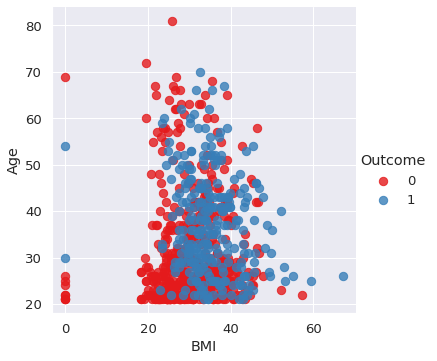

In [54]:
sns.lmplot('BMI', 'Age', data = df, hue='Outcome',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70});

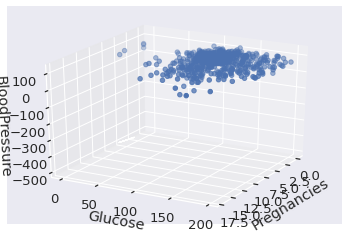

In [63]:

plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_train['Pregnancies'], X_train['Glucose'], X_train['BloodPressure'], c='b')
ax.set_xlabel('Pregnancies')
ax.set_ylabel('Glucose')
ax.set_zlabel('BloodPressure')

zz = lambda xx,yy: (-svm_linear.intercept_[0]-svm_linear.coef_[0][0]*xx-svm_linear.coef_[0][1]*yy) / svm_linear.coef_[0][2]
tmpx = np.linspace(4, 7, 20)
tmpy = np.linspace(2, 5, 20)
xx,yy = np.meshgrid(tmpx,tmpy)
ax.plot_surface(xx, yy, zz(xx,yy), cmap='Reds')
for ii in range(0,30,1):
    ax.view_init(elev=25, azim=ii)